In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
with open('/Users/r.shinoda/Desktop/02151602Eu152.txt') as f:
    lines = f.readlines()
    num = len(lines)/1023
    print(num)

263934.0


/var/folders/lk/24n66b3515jcx3tvdn5cb_yw0000gn/T/ipykernel_784/2417830773.py:16: RuntimeWarning: Mean of empty slice.
  test.mean()
/var/folders/lk/24n66b3515jcx3tvdn5cb_yw0000gn/T/ipykernel_784/2417830773.py:17: RuntimeWarning: Mean of empty slice.
  plt.plot(test - test[0:500].mean())


(500.0, 600.0)

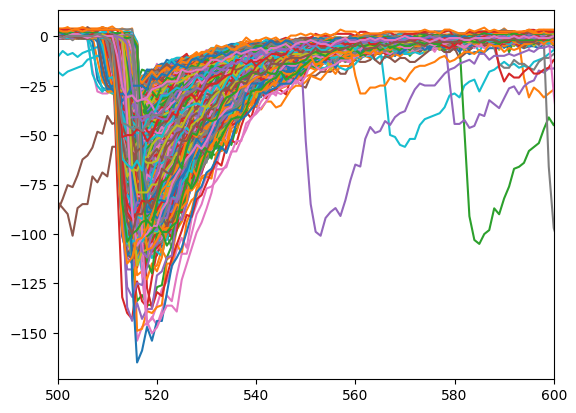

In [53]:
N = 1

L = 1000000

with open('/Users/r.shinoda/Desktop/02151602Eu152.txt') as f:
    lines = []
    for i in range(L):
        lines.append(f.readline())



plt.figure()

for N in range(2000):
    test = np.array([int(line) for line in lines[N*1023:N*1023+1023]])
    test.mean()
    plt.plot(test - test[0:500].mean())
plt.xlim([500, 600])

In [47]:
test.mean()

3686.24926686217

In [3]:
N_points = 1023
data = np.array([int(line) for line in lines])
length = len(data)//N_points
data_res = data[:length * N_points].reshape(-1,N_points)

def intg(d):
    return (d[510:600] - d[:500].mean()).sum()

array = [-intg(d) for d in data_res]
hist, edges = np.histogram(array, bins=5000, range=(0,5000))
del lines
del data
del data_res

Text(0, 0.5, 'counts')

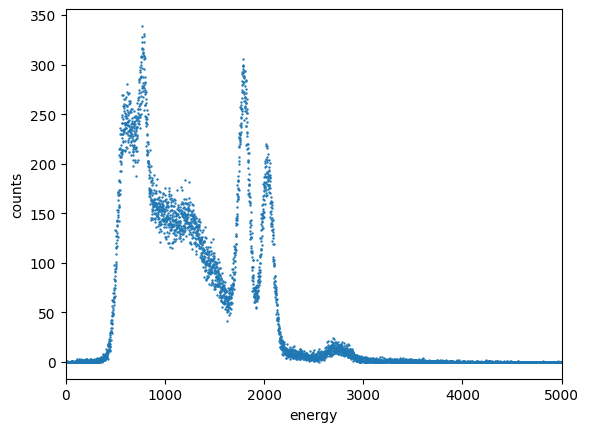

In [5]:
plt.scatter(edges[:-1], hist, s=0.5)
plt.xlim([0, 5000])
plt.xlabel('energy')
plt.ylabel('counts')
#plt.yscale('log')

In [6]:
np.save('/Users/r.shinoda/Desktop/1602Eu152hist.npy', hist)
np.save('/Users/r.shinoda/Desktop/1602Eu152edges.npy', edges)

[428.85589191 662.53856     54.16657803]


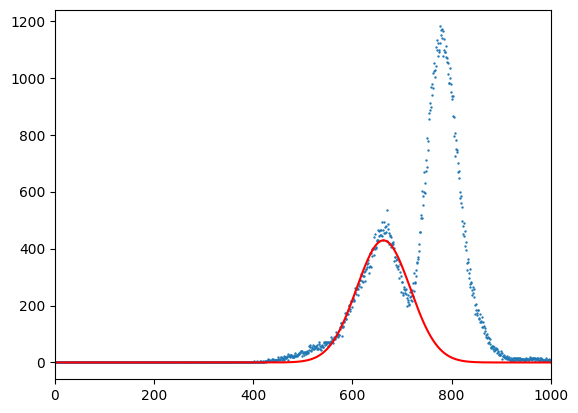

In [32]:
from scipy.optimize import curve_fit

plt.scatter(edges[:-1], hist, s=0.5)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

fit_range_mask = (bin_centers >= 500) & (bin_centers <= 700)   #edit here!!!!!!
fit_range_bin_centers = bin_centers[fit_range_mask]
fit_range_hist_data = hist[fit_range_mask]

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

initial_params = [400, 650, 15]   #edit here!!!!!! [amplitude, center, stddev]

params, covariance = curve_fit(gaussian, fit_range_bin_centers, fit_range_hist_data, p0=initial_params)
amplitude, mean, stddev = params

plt.plot(bin_centers, gaussian(bin_centers, amplitude, mean, stddev), 'r-', label='Gaussian Fit')
plt.xlim([0, 1000])
print(params)

y = 0.56x + -76.32
1676.122807017544 1890.1578947368425


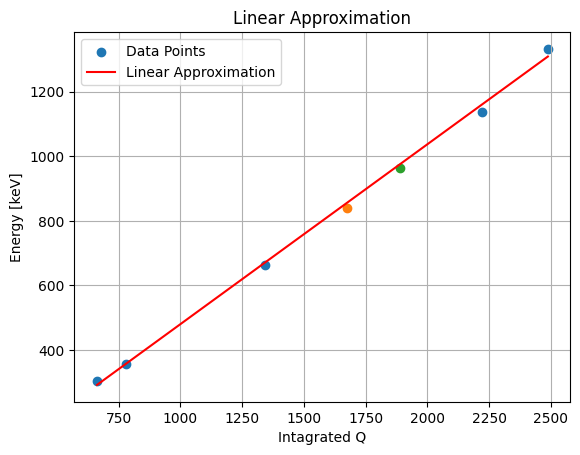

In [49]:
def linapp(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c

#y = [511, 662, 1275]    # Energy [keV]

xarray = [662, 780, 1343, 2222, 2488]    # ADC channel
yarray = [303, 356, 662, 1137, 1332]   # Energy [keV]

slope, intercept = linapp(xarray, yarray)
print(f"y = {slope:.2f}x + {intercept:.2f}") #傾きが1ADCカウントが何keVに対応するか

plt.scatter(xarray, yarray, label='Data Points')
plt.plot(xarray, [slope * x + intercept for x in xarray], 'r', label='Linear Approximation')
plt.xlabel('Intagrated Q')
plt.ylabel('Energy [keV]')
plt.title('Linear Approximation')
plt.legend()
plt.grid(True)
plt.scatter((841+114.39)/0.57,841)
print((841+114.39)/0.57, (963+114.39)/0.57)
plt.scatter((963+114.39)/0.57,963)

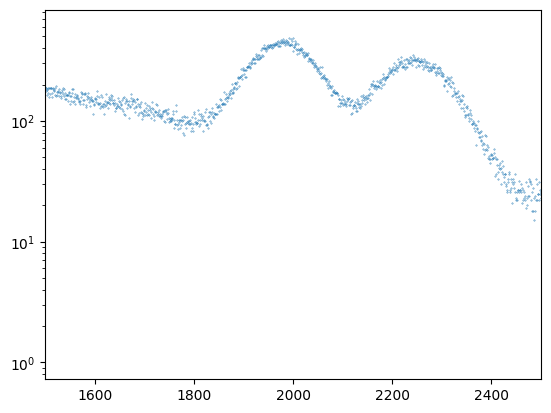

In [35]:
t = np.load('/Users/r.shinoda/Desktop/Eu152hist.npy')
s = np.load('/Users/r.shinoda/Desktop/Eu152edges.npy')
plt.scatter(s[:-1],t,s=0.1)
plt.xlim([1500,2500])
plt.yscale('log')

In [30]:
0.57*2850-114.39

1510.1099999999997